<a href="https://colab.research.google.com/github/enasshalolh/my_coulb_project/blob/main/Clustering_Fashion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Loading and Exploring the Fashion MNIST Dataset


Training data size: (60000, 28, 28)
Test data size: (10000, 28, 28)


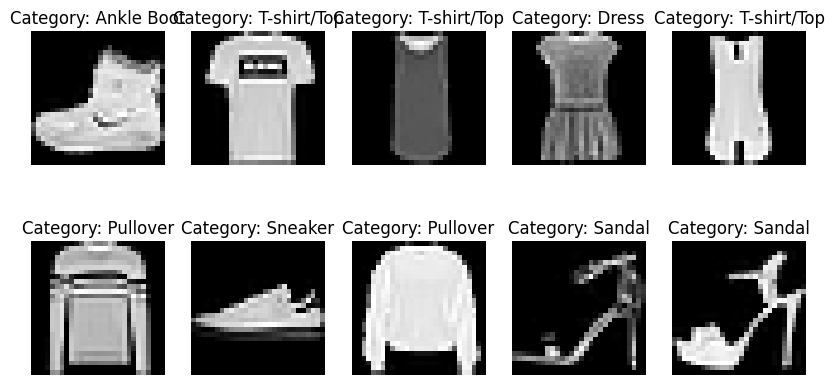

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# تحميل بيانات Fashion MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# قائمة بأسماء الفئات (ترتيبًا حسب الأرقام من 0 إلى 9)
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# طباعة حجم بيانات التدريب والاختبار
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

# عرض بعض العينات من البيانات مع أسماء الفئات
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")  # عرض الصورة باللون الرمادي
    ax.set_title(f"Category: {class_names[y_train[i]]}")  # عرض اسم الفئة
    ax.axis("off")  # إخفاء الإطار

plt.show()


2.Data Preprocessing and Normalization


In [ ]:
from sklearn.preprocessing import StandardScaler

# تحويل الصور إلى مصفوفات 1D (تحويلها من 28x28 إلى 784 قيمة)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# تطبيع البيانات لتكون القيم بين 0 و 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)

# طباعة شكل البيانات بعد التحويل
print(f"Data shape after transformation: {X_train_scaled.shape}")



Data shape after transformation: (60000, 784)


3.Applying K-Means Clustering


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
# تحديد عدد التجمعات (10 مجموعات لأن لدينا 10 أصناف من الملابس)
num_clusters  = 10

# تطبيق خوارزمية K-Means
kmeans = KMeans(n_clusters=num_clusters , random_state=42, n_init=10)
labels = kmeans.fit_predict(X_train_scaled)

# حفظ التجمعات في DataFrame
df_clusters = {"Image_Index": np.arange(len(labels)), "Cluster": labels}
df_clusters = pd.DataFrame(df_clusters)

print("Cluster distribution:")
print(df_clusters["Cluster"].value_counts())


Cluster distribution:
Cluster
8    9276
4    9100
5    7997
0    7700
3    7422
9    6718
6    4656
2    2489
1    2351
7    2291
Name: count, dtype: int64


4.Visualizing Clusters using PCA


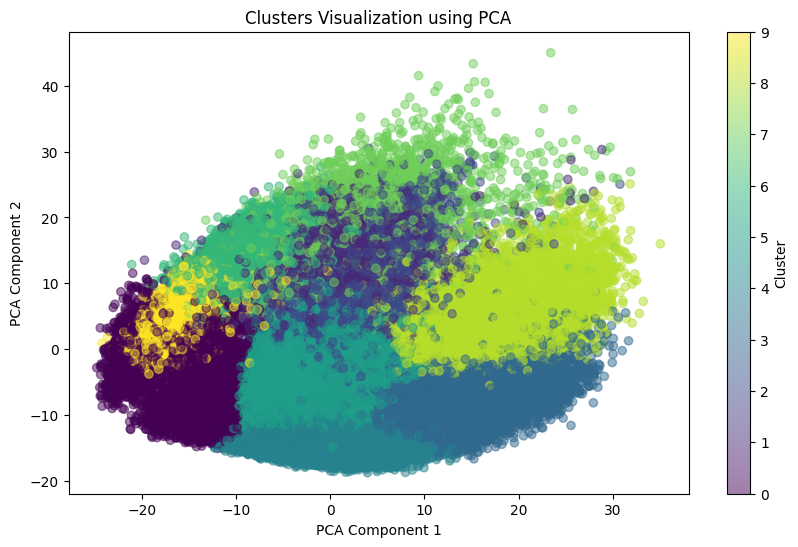

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# تقليل الأبعاد إلى 2D باستخدام PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# عرض النتائج في رسم بياني
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualization using PCA")
plt.show()


5.Cluster Analysis and Sample Visualization

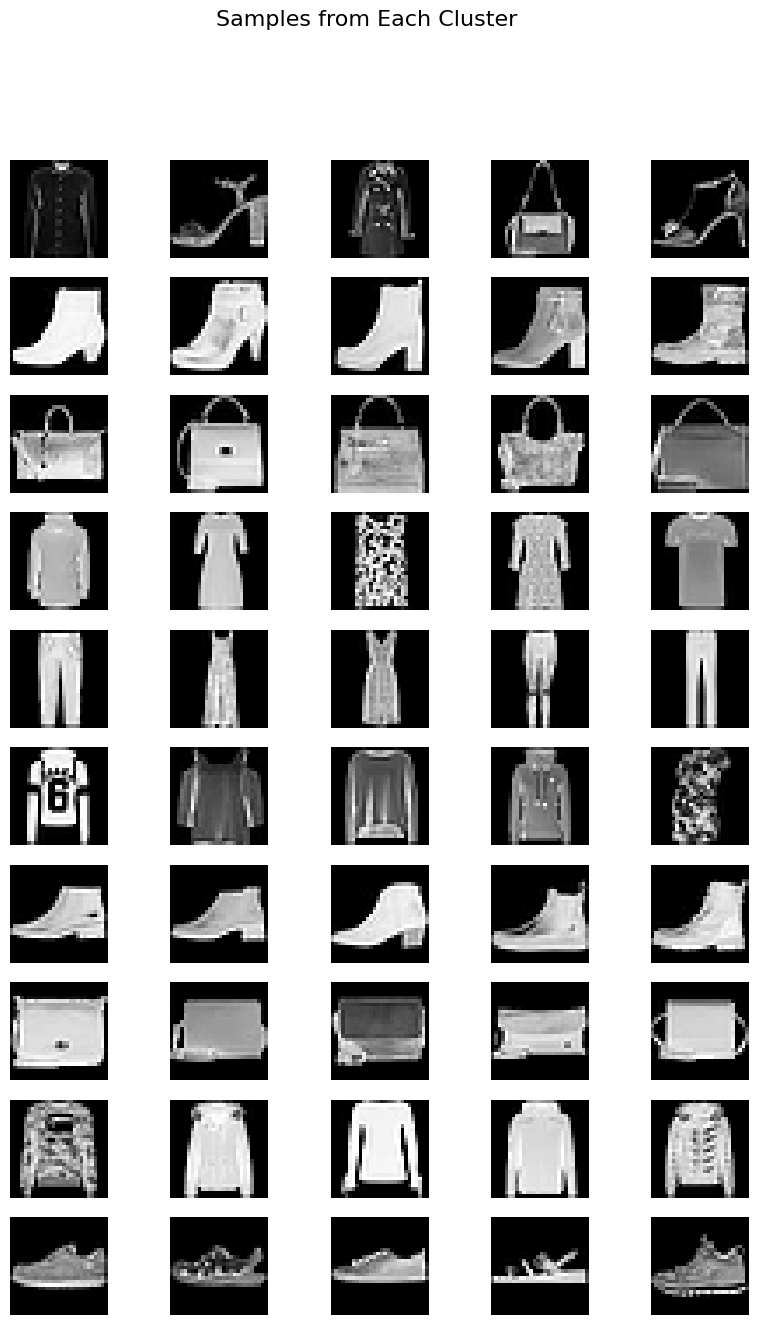

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# عدد التجمعات (نفس قيمة K المستخدمة في K-Means)
num_clusters = 10

# إنشاء رسم يحتوي على صور من كل مجموعة
fig, axes = plt.subplots(num_clusters, 5, figsize=(10, 15))  # 10 صفوف × 5 صور لكل مجموعة

for cluster in range(num_clusters):
    # الحصول على جميع الصور التي تنتمي لهذا التجمع
    cluster_indices = np.where(labels == cluster)[0]

    # اختيار 5 صور عشوائية من هذه المجموعة
    selected_indices = np.random.choice(cluster_indices, 5, replace=False)

    # عرض الصور
    for i, img_idx in enumerate(selected_indices):
        axes[cluster, i].imshow(X_train[img_idx], cmap="gray")
        axes[cluster, i].axis("off")

    # تسمية الصف برقم المجموعة
    axes[cluster, 0].set_ylabel(f"Cluster {cluster}", fontsize=12, rotation=90, labelpad=10)

plt.suptitle("Samples from Each Cluster", fontsize=16)
plt.show()


6.Evaluating Clustering Performance


In [ ]:
# استيراد المكتبات اللازمة لحساب مقاييس التقييم
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# حساب Silhouette Score (كلما كان أقرب إلى 1، كان التجميع أفضل)
silhouette_avg = silhouette_score(X_train_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# حساب Davies-Bouldin Index (كلما كان أصغر، كان التجميع أفضل)
db_score = davies_bouldin_score(X_train_scaled, labels)
print(f"Davies-Bouldin Index: {db_score:.4f}")

# حساب Calinski-Harabasz Index (كلما كان أكبر، كان التجميع أفضل)
ch_score = calinski_harabasz_score(X_train_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_score:.4f}")


Silhouette Score: 0.1265
Davies-Bouldin Index: 2.0652
Calinski-Harabasz Index: 5325.6864


الخطوة الاولى :
تم تحميل بيانات Fashion MNIST باستخدام مكتبة TensorFlow، والتي تحتوي على:

60,000 صورة تدريب (X_train) مع التصنيفات (y_train).
10,000 صورة اختبار (X_test) مع التصنيفات (y_test).
 بعد تحميل البيانات، نقوم بعرض بعض الصور مع أسماء الفئات الخاصة بها.
 تمثل كل فئة نوعًا معينًا من الملابس، حيث تم تحديد أسماء الفئات في القائمة class_names.


النتيجة :
Training data size: (60000, 28, 28) → لدينا 60,000 صورة تدريب بحجم 28×28.
Test data size: (10000, 28, 28) → لدينا 10,000 صورة اختبار بنفس الأبعاد.
هذا يؤكد أن البيانات تم تحميلها بدون مشاكل.
م عرض 10 صور من بيانات التدريب.
تم إضافة عناوين أعلى كل صورة توضح فئة الملابس (T-shirt, Sneaker, Dress, ...).
الصور تظهر باللون الرمادي (cmap="gray").
الخطوة الثانية :
تم تحويل كل صورة (28×28) إلى مصفوفة تحتوي على 784 قيمة لجعل البيانات ملائمة لخوارزمية K-Means.

تم تطبيع القيم لجعل المتوسط 0 والانحراف المعياري 1، مما يجعلها أكثر توازنًا لتحسين أداء النماذج وجعل القيم متوازنة
الخطوة الثالثة :
 تحديد عدد التجمعات (K=10) لتتناسب مع عدد الفئات الفعلية
 تطبيق خوارزمية KMeans على البيانات بعد تطبيعها
حفظ النتائج في DataFrame لعرض عدد الصور في كل مجموعة
 تم طباعة التوزيع باستخدام value_counts()
الخطوة الرابعة :
تطييق PCA(n_components=2) لتقليل الأبعاد من 784 إلى 2.
 تحويل البيانات (X_train_scaled) إلى الفضاء الجديد (X_pca).
 رسم النقاط الملونة حسب التجمعات (labels) باستخدام scatter plot.
 إضافة شريط ألوان (colorbar) لتمييز كل تجمع بلون مختلف.
النتيجة :
الرسم البياني يعرض التجمعات بشكل مرئي بناءً على أهم مكونين في PCA.
 تظهر بعض الفئات متميزة بينما قد يكون هناك بعض التداخل، مما يشير إلى إمكانية تحسين التجميع.
 الألوان توضح كيف تم تقسيم البيانات إلى التجمعات المحددة.
الخطوة الخامسة :
إنشاء شبكة صور (subplot) بحجم 10x5 بحيث يحتوي كل صف على 5 صور من كل مجموعة.
اختيار 5 صور عشوائية من كل مجموعة (Cluster) لعرضها باستخدام imshow().
 إخفاء المحاور (axis("off")) لجعل الصور أكثر وضوحًا.
 إضافة تسمية (ylabel) لكل صف توضح رقم المجموعة (Cluster).
 إضافة عنوان (suptitle) لشرح محتوى الرسم البياني.
الخطوة السادسة :
بعد تطبيق خوارزمية K-Means، نقوم بقياس جودة التجمعات باستخدام 3 مقاييس تقييم رئيسية:

Silhouette Score :كلما اقترب من 1.0 كان التجميع أفضل.
Davies-Bouldin Index : كلما كان أصغر، كان التجميع أكثر تمايزًا.
Calinski-Harabasz Index :كلما كان أكبر، كان التجميع أكثر وضوحًا.






